<img src="https://www.mines.edu/webcentral/wp-content/uploads/sites/267/2019/02/horizontallightbackground.jpg" width="100%"> 
### CSCI250 Python Computing: Building a Sensor System
<hr style="height:5px" width="100%" align="left">

# Concurrent code execution

# Objective
* introduce concurrent code execution
* use Python threads
* use Python queues

# Resources
* [Python threading](https://docs.python.org/3/library/threading.html)
* [Python queuing](https://docs.python.org/3/library/queue.html)

# Definition

**Concurrency** means that 
* multiple tasks are executed within the same time frame
* the tasks are unrelated and may be dependent on one-another

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time, threading, queue

# `threading` module

Implements a system that enables execution in concurrent threads.

**Threads** use code sequences executed independently.

`threading` functions provide access to thread information.

In [2]:
help(threading)

Help on module threading:

NAME
    threading - Thread module emulating a subset of Java's threading model.

MODULE REFERENCE
    https://docs.python.org/3.9/library/threading
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

CLASSES
    builtins.Exception(builtins.BaseException)
        builtins.RuntimeError
            BrokenBarrierError
    builtins.object
        _thread._local
        Barrier
        Condition
        Event
        Semaphore
            BoundedSemaphore
        Thread
            Timer
    builtins.tuple(builtins.object)
        _thread.ExceptHookArgs
    
    class Barrier(builtins.object)
     |  Barrier(parties, action=None, timeout=None)
     |  
     |  Implements a Barrier.
     |  
    

## `threading.active_count()`
Returns the number of `Thread` objects currently alive.

In [5]:
# Returns number of thread objects currently running
threading.active_count()

8

## `threading.main_thread()`
Returns the main `Thread` object (from which Python was started).

In [6]:
# Gives ID to the object from which python was started
threading.main_thread()

<_MainThread(MainThread, started 3069909376)>

## `threading.current_thread()`
Return the current `Thread` controlled by the user.

In [8]:
# Returns current thread controlled by user may or may not be the main thread
threading.current_thread()

<_MainThread(MainThread, started 3069909376)>

## `threading.get_ident()`
Return a non-zero integer that uniquely identifies the current thread.

In [11]:
# Returns identity of the current thread
threading.get_ident()
# Important for conditions that only certain threads can run

3069909376

## `threading.enumerate()`
Returns a list of all `Thread` objects currently alive.

In [12]:
# Returns list of all the threads alive
threading.enumerate()

[<_MainThread(MainThread, started 3069909376)>,
 <Thread(IOPub, started daemon 3010458688)>,
 <Heartbeat(Heartbeat, started daemon 2999972928)>,
 <Thread(Thread-3, started daemon 2970612800)>,
 <Thread(Thread-4, started daemon 2960127040)>,
 <ControlThread(Control, started daemon 2949641280)>,
 <HistorySavingThread(IPythonHistorySavingThread, started 2939155520)>,
 <ParentPollerUnix(Thread-2, started daemon 2930762816)>]

# `threading` demo
We will use a function that simply waits for a specified time.

In [13]:
def myFunc(i,t):              # receives a task ID and a wait time
    time.sleep(t)             # wait the specified time
    print("%3d %6.2f"%(i,t))  # display the ID and wait time

In [14]:
i = 0    # task ID
t = 2.0  # delay time
myFunc(i, t)

  0   2.00


## `threading.Thread()`
A class that defines threads and thread operations.

`threading.Thread(target, name, args)`

* `target`: a function
* `name`: the thread name
* `args`: an argument tuple for the function invocation

We will work primarily with `target` and `args`.

In [15]:
threading.Thread?

In [17]:
# Defining a thread
# target = a function previously defined, args = inputs passed into previously defined function
t = threading.Thread( target = myFunc, args = (0,1))
print(t)

<Thread(Thread-6, initial)>


## `Thread.start()`
Starts the activity of a thread object.

A thread is considered **alive** once its activity starts. 

In [18]:
# define a thread that waits for 1 second
t = threading.Thread( target = myFunc, args=(0,1))

print('# of threads before thread start =', threading.active_count())
t.start() # starts thread
print('# of threads after thread start =', threading.active_count())
time.sleep(2)
print('# of threads after thread start =', threading.active_count())

# of threads before thread start = 8
# of threads after thread start = 9
  0   1.00
# of threads after thread start = 8


## `Thread.is_alive()`
Returns a boolean indicating whether a thread is alive.

In [19]:
# define thread (waits for 2 seconds)
t = threading.Thread( target = myFunc, args = (0,2))

# start the thread
t.start()

# check thread status
for i in range(5):
    print( i, t.is_alive()) # prints time and bool if alive
    time.sleep(1)           # check every 1 second

0 True
1 True
  0   2.00
2 False
3 False
4 False


We can define multiple threads, then initiate them at once.

In [20]:
ta = threading.Thread( target = myFunc, args = (0,2.0))
tb = threading.Thread( target = myFunc, args = (1,3.0))
tc = threading.Thread( target = myFunc, args = (2,5.0))

In [21]:
# Check how many threads are alive
print('alive threads', threading.active_count())

# start all threads in close succession
ta.start() #  short time
tb.start() # medium time
tc.start() #   long time

print('alive threads', threading.active_count())

alive threads 8
alive threads 11
  0   2.00
  1   3.00
  2   5.00


We can check thread status over time.

In [23]:
ta = threading.Thread( target = myFunc, args = (0,2.0) )
tb = threading.Thread( target = myFunc, args = (1,3.0) )
tc = threading.Thread( target = myFunc, args = (2,5.0) )

In [24]:
# start all threads in close succession
ta.start() #  short time
tb.start() # medium time
tc.start() #   long time

for i in range(10):
    print(i, ta.is_alive(), tb.is_alive(), tc.is_alive())
    time.sleep(1)

0 True True True
1 True True True
  0   2.00
2 False True True
  1   3.00
3 False False True
4 False False True
5 False False True
  2   5.00
6 False False False
7 False False False
8 False False False
9 False False False


In [ ]:
## Quick Review
## threading.main_thread()          - returns main thread
## threading.current_thread()       - returns current thread
## threading.get_ident()            - returns thread ID
## threading.enumerate()            - lists all active therads
## threading.Thread(target, name, args) - target is a previously defined function, args are passed into that function
## Thread.is_alive()                - returns bool if thread is active
## theading.active_count()          - returns number of threads active
## Thread.start()                   - Thread begins running program defined in target untill complete

# `queue` module
Implements a multi-producer, multi-consumer system.
* **producers**: add elements to a queue
* **consumers**: remove elements from a queue

Used to pass data between code executed in separate threads.

## `Queue` class
A class that defines a FIFO queue and associated operations.

## `Queue.put()`
Put an item into the queue.

## `Queue.get()`
Remove and return an item from the queue.

## `Queue.task_done()`
Indicate that a formerly enqueued task is complete.

##  `Queue.join()`
Blocks execution until all items in the `Queue` have been processed.

Experiment with the `queue` class using a **fast producer** function,...

In [25]:
import string
def myA(Q): # puts items into a queue named Q
    message = 'Hello Colorado School of Mines students enrolled in CSCI 250'
    
    for item in (message.split()):
        Q.put(item)                     # put into the queue
        print('>A>', item)              # announce a 'put' action
        time.sleep(0.5)                 # short delay

...,and a couple of **slow consumer** functions:

In [28]:
def myB(Q): # gets items from a queue named Q
    while True:        
        item = Q.get()                       # get from the queue
        print('\t <B<',item)                 # announce a 'get' action
        time.sleep(1.0)                      # medium delay between get   
        Q.task_done()                        # mark task completion
        
def myC(Q): # gets items from a queue named Q
    while True:        
        item = Q.get()                       # get from the queue        
        print('\t <C<',item)                 # announce a 'get' action
        time.sleep(3.0)                      # long delay between get 
        Q.task_done()                        # mark task completion

We will start all threads in close succession ("at once"):
* A ads to Q faster than B and C can extract from Q
* Q gets longer because the consumers cannot keep up
* when A is done, B and C continue to consume from Q
* B (medium delay) extracts more from Q than C (long delay)

In [32]:
# define a queue
Q = queue.Queue()

# define threads for producer (A) and consumers (B,C)
tA = threading.Thread(target=myA, args=(Q,)) # put   in Q;  short delay
tB = threading.Thread(target=myB, args=(Q,)) # get from Q; medium delay
tC = threading.Thread(target=myC, args=(Q,)) # get from Q;   long delay

In [33]:
# start all programs as independent threads
tA.start() 
tB.start() 
tC.start()

# keep all threads working until the queue is empty
Q.join() 

>A> Hello
	 <B< Hello
>A> Colorado
	 <C< Colorado
>A> School
	 <B< School
>A> of
>A> Mines
	 <B< of
>A> students
>A> enrolled
	 <B< Mines
	 <C< students
>A> in
>A> CSCI
	 <B< enrolled
>A> 250
	 <B< in
	 <B< CSCI
	 <C< 250


<img src="https://www.dropbox.com/s/7vd3ezqkyhdxmap/demo.png?raw=1" width="10%" align="left">

# Demo
Set-up a producer and a consumer, and pass data between them:

* the producer adds to the queue and waits;
* the consumer gets from the queue when data are available;
* the process ends when the queue is empty.

In [34]:
# define producer
def myPROD(Q, n):

    for i in range(n):
        print('P: put',i*i)  # announce a 'put' action
        Q.put(i*i)           # put into the queue
        time.sleep(1)        # wait 1s
        
# define consumer
def myCONS(Q, n):
    
    for i in range(n):
        h = Q.get()           # get from the queue
        print('C: get',h)     # announce a 'get' action
        Q.task_done()         # mark task completion

In [35]:
# create the queue to pass messages
Q = queue.Queue()

# set how many messages to pass
n = 5

# define the threads
tP = threading.Thread(target=myPROD, args=(Q,n)) # producer
tC = threading.Thread(target=myCONS, args=(Q,n)) # consumer

# start the threads
tP.start()
tC.start()

# keep working until the queue is empty
Q.join()

P: put 0
C: get 0
P: put 1
C: get 1
P: put 4
C: get 4
P: put 9
C: get 9
P: put 16
C: get 16


<img src="https://www.dropbox.com/s/7vd3ezqkyhdxmap/demo.png?raw=1" width="10%" align="left">

# Demo
Set-up three processes: a producer, a consumer, and an observer. 

* the producer passes data to the consumer through a queue
* the observer monitors the queue status (length)

In [36]:
# define the producer
# completes task in workT, waits for dt     
def myPRO(Q, workT, dt):
    
    t = 0.0
    while t < workT:
        Q.put(t)       # add to queue
        time.sleep(dt)
        t += dt

In [37]:
# define consumer:
# completes task in workT; waits for dt
def myCON(Q, workT, dt):
    
    t = 0.0
    while t < workT:
        h = Q.get()    # extract from queue
        time.sleep(dt)
        Q.task_done()    
        t += dt

In [38]:
# define observer
# executes task for workT; waits for dt
def myOBS(Q, workT, dt):
    nt = int(workT / dt)
    
    t = np.empty(nt)              # time
    q = np.empty(nt)              # queue size
    
    to = time.time()
    for i in range(nt):
        q[i] = len(Q.queue)       # get queue size
        t[i] = time.time() - to   # record the time
        time.sleep(dt)
    
    # plot queue size vs. time
    plt.figure(figsize=(15,5))
    plt.plot(t,q,'r.')

    plt.title('queue monitor')
    plt.xlabel('t(s)')
    plt.ylabel('Q')
    
    plt.ylim([0,200])
    plt.xlim([0,workT])
    plt.grid()
    
    plt.show()

### 1 producer, 1 consumer

In [39]:
pDURATION = 1.0   # producer time
pDELAY    = 0.01  # producer delay

cDURATION = 3.0   # consumer time
cDELAY    = 0.03  # consumer delay

oDURATION = 6.0   # observer time
oDELAY    = 0.001 # observer delay

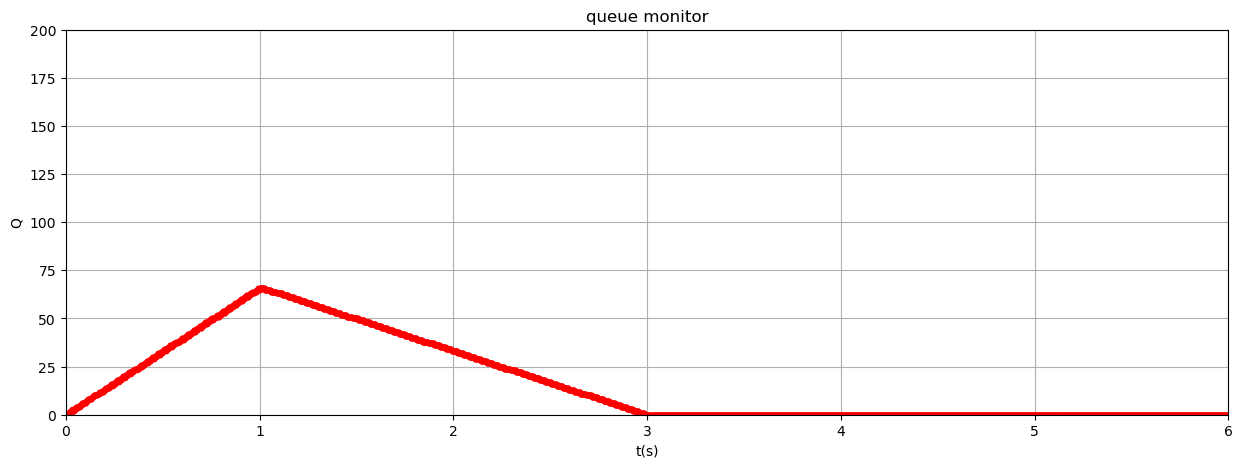

In [40]:
Q = queue.Queue() 

O  = threading.Thread(target=myOBS, args=(Q, oDURATION, oDELAY)) # observer
P  = threading.Thread(target=myPRO, args=(Q, pDURATION, pDELAY)) # producer
C  = threading.Thread(target=myCON, args=(Q, cDURATION, cDELAY)) # consumer

O.start()    # observer
P.start()    # producer
C.start()    # consumer

Q.join()

### 2 producers, 2 consumers

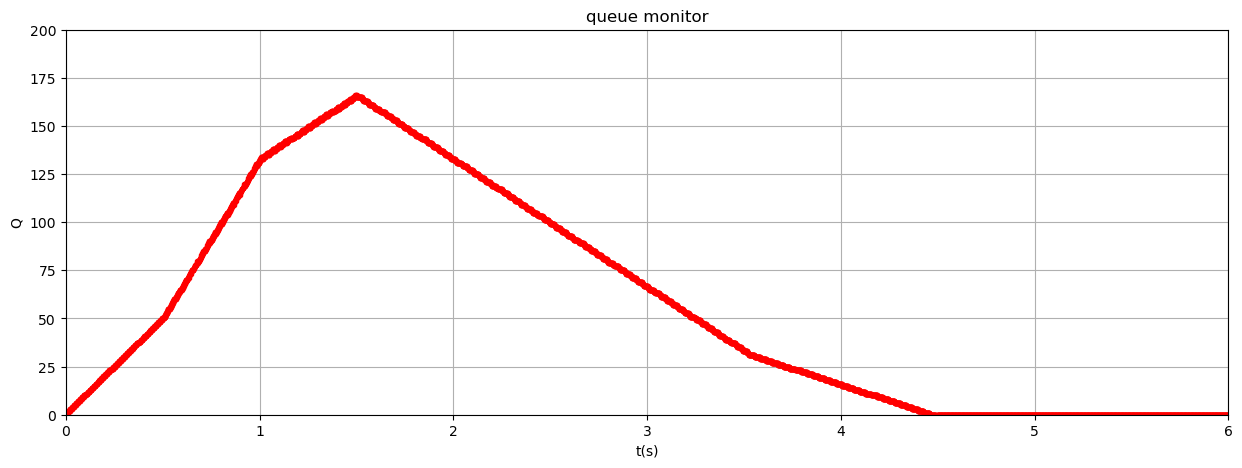

In [41]:
Q = queue.Queue() 

O  = threading.Thread(target=myOBS, args=(Q, oDURATION, oDELAY)) # observer
P1 = threading.Thread(target=myPRO, args=(Q, pDURATION, pDELAY)) # producer 1
P2 = threading.Thread(target=myPRO, args=(Q, pDURATION, pDELAY)) # producer 2
C1 = threading.Thread(target=myCON, args=(Q, cDURATION, cDELAY)) # consumer 1
C2 = threading.Thread(target=myCON, args=(Q, cDURATION, cDELAY)) # consumer 2

O.start()    # observer
P1.start()   # producer 1
time.sleep(0.5)
P2.start()   # producer 2
C1.start()   # consumer 1
time.sleep(1.0)
C2.start()   # consumer 2

Q.join()